### import Keras Libraries

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Model
from keras.layers import Dense, Embedding, Input, LSTM, Bidirectional, GlobalMaxPool1D, Dropout
from keras.preprocessing import text, sequence
from keras.callbacks import EarlyStopping, ModelCheckpoint



In [63]:
# load data
path='/Users/fengxiao/Documents/Johns Hopkins MS Data Science/2018 Spring/ML projects/Toxic Comment Classification Challenge/'
train=pd.read_csv(path+'train 2.csv')
test = pd.read_csv(path + 'test 2.csv')

In [74]:
#assign none toxic tag
#train['clean']=1-train.iloc[:,2:].max(1)


# X and y
y= train.iloc[:,2:].values
X= train['comment_text']
X_t = test['comment_text']

## Text tokenize - prepare for LSTM

In [ ]:
maxlen=200

In [75]:
# Tokenize comment text use Keras text preprocessing
tokenizer= text.Tokenizer(num_words=maxlen)
tokenizer.fit_on_texts(list(X))
list_tokenized_train = tokenizer.texts_to_sequences(X)
list_tokenized_test = tokenizer.texts_to_sequences(X_t)


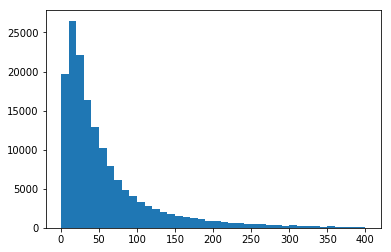

In [59]:
# distribution of number of words in sentences to determin length range
#numberOfWords = [len(sentence) for sentence in list_tokenized_train]
plt.hist(numberOfWords,bins=np.arange(0,410,10))
plt.show()

In [76]:
# 200 is a resonable number to be the maxlen

X_train= sequence.pad_sequences(list_tokenized_train, maxlen=maxlen )
X_test=sequence.pad_sequences(list_tokenized_test , maxlen=maxlen)

In [46]:
#tfidf tokenized
#X_train1= tokenizer.texts_to_matrix(list(X),mode='tfidf')
#X_test1 = tokenizer.texts_to_matrix(list(X_test), mode='tfidf')

## Built the Model

In [77]:
# model construct
def get_model():
    embed_size = 128
    inp = Input(shape=(maxlen,))
    #embedding - to project the words to a defined vector space depending on the distance of the surrounding words in a sentence
    x=Embedding(maxlen,embed_size)(inp)
    x=LSTM(60,return_sequences=True)(x)
    x=GlobalMaxPool1D()(x)
    x=Dropout(0.1)(x)
    x=Dense(50,activation='relu')(x)
    x=Dropout(0.1)(x)
    x=Dense(6, activation='sigmoid')(x)
    model= Model(inputs=inp, outputs=x)
    model.compile(loss ='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model
    

In [80]:
model=get_model()
batch_size =32
epochs = 2
early = EarlyStopping(monitor='val_loss',mode='min')
model.fit(X_train, y, batch_size=batch_size, epochs= epochs, validation_split=0.1,callbacks=[early])

Train on 143613 samples, validate on 15958 samples
Epoch 1/2
143613/143613 [==============================] - 2492s 17ms/step - loss: 0.1046 - acc: 0.9685 - val_loss: 0.0907 - val_acc: 0.9702
Epoch 2/2
143613/143613 [==============================] - 2687s 19ms/step - loss: 0.0907 - acc: 0.9712 - val_loss: 0.0899 - val_acc: 0.9706


In [81]:
y_test=model.predict(X_test)

In [91]:
labels=['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
y_te=pd.DataFrame(y_test,columns=labels)

In [100]:
submission = pd.concat([test,y_te], axis=1).drop('comment_text',1)

In [102]:
submission.to_csv(path+'submission.csv',index=False)